# Lab 1: Categorical Data
[![https://imgs.xkcd.com/comics/salvage.png](https://imgs.xkcd.com/comics/salvage.png)](https://imgs.xkcd.com/comics/salvage.png)

We know who was on the titanic the day it sank and we know who survived. Your taks today is to analyze the public available data to find more about the people.

In [3]:
import pip
!pip install numpy matplotlib pandas
!pip install plotly==4.12.0

You should consider upgrading via the 'C:\Users\sandr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\sandr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


## TASK 1

Use Python to answer the following questions. Use the print command to present your answer in a full sentence.

### 1. First, load the data set
The data set is named `titanic.csv`. Print the head of the data set.

In [4]:
# YOUR CODE HERE
import pandas as pd

data = pd.read_csv('titanic.csv')
print(f"The head of the dataset titanic.csv is:" )
data.head()

The head of the dataset titanic.csv is:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. How many passengers have embarked in Southampton?

In [5]:
# YOUR CODE HERE
data['S' == data.Embarked].shape

(644, 12)

### 3. Who has paid most for his/her ticket? Find out the name of this passenger.

In [6]:
# YOUR CODE HERE
data[data['Fare'].max() == data["Fare"]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


### 4. Who was the youngest passenger? Find out his/her name and age.

In [7]:
# YOUR CODE HERE
data[data['Age'].min() == data['Age']]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


### 5. Who was the oldest passenger who did not survive? Find out his/her name and age.

In [8]:
# YOUR CODE HERE
data.loc[data.Survived == 0].loc[data.Age.max()].head()

PassengerId                      81
Survived                          0
Pclass                            3
Name           Waelens, Mr. Achille
Sex                            male
Name: 80, dtype: object

## TASK 2

Use Python's plotting libraries to visualize the following insights.

Remember that each plot has a **title**, **axis labels** and a **legend**.

### 1. Grouped bar plot showing how many passengers died/survived for each passenger class

Text(0.5, 1.0, 'Survivel outcome for each typ of class')

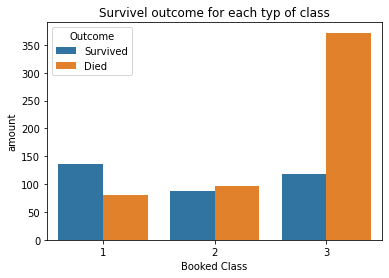

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

firstS =len( data.loc[data.Survived == 1].loc[data.Pclass == 1])
firstD = len(data.loc[data.Survived == 0].loc[data.Pclass == 1])
secondS =len(data.loc[data.Survived == 1].loc[data.Pclass == 2])
secondD = len(data.loc[data.Survived == 0].loc[data.Pclass == 2])
thirdS =len(data.loc[data.Survived == 1].loc[data.Pclass == 3])
thirdD = len(data.loc[data.Survived == 0].loc[data.Pclass == 3])


df = pd.DataFrame([['Survived', '1', firstS],['Survived','2', secondS], ['Survived','3', thirdS], ['Died', '1', firstD],['Died','2', secondD], ['Died','3', thirdD]],columns=['Outcome', 'Booked Class', 'amount'])

df.head()

sns.barplot(data=df, x='Booked Class', y='amount', hue='Outcome')

plt.title('Survivel outcome for each typ of class')


### 2. Sankey diagram
[Sankey diagrams](https://plot.ly/python/sankey-diagram/) are flow diagrams that visualize the flow from one category to another. Sankey diagarams are advanced plots that are avaible, for instance, in the [plotly framework](https://plot.ly/python/) that supports interactive graphs. 

Use a Sankey diagram to visualize how many passengers from each embarking location survived/did not survive.

![Example Sankey Diagram](https://plot.ly/~PythonPlotBot/2588/basic-sankey-diagram.png)

First of, prepare the data in such a way, that it can be visualized later on. For help on that, please be refered to the [official docs](https://plotly.com/python/sankey-diagram/#hovertemplate-and-customdata-of-sankey-diagrams). Important to know is, that you need to define for each _stream_ a `source`, `target` and `value`. The `source` is the embarking location, the `target` if survived or not and the `value` the number of people who died or survived.

In [10]:
# Imports only needed if not imported above
#import pandas as pd
#import numpy as np

#Read Titanic data. Only neede if not already done above
#data = pd.read_csv('titanic.csv')

#Checked if Embarked or Survival has Nan
len(data.loc[data.Survived.isna()])
len(data.loc[data.Embarked.isna()])


survivedSouthampton =len( data.loc[data.Survived == 1].loc[data.Embarked == "S"])
diedSouthampton = len(data.loc[data.Survived == 0].loc[data.Embarked == "S"])
survivedCherbourg =len(data.loc[data.Survived == 1].loc[data.Embarked == "C"])
diedCherbourg = len(data.loc[data.Survived == 0].loc[data.Embarked   == "C"])
survivedQueenstown =len(data.loc[data.Survived == 1].loc[data.Embarked == "Q"])
diedQueenstown = len(data.loc[data.Survived == 0].loc[data.Embarked == "Q"])
survivedNan = len(data.loc[data.Survived == 1].loc[data.Embarked.isna()])
diedNan =  len(data.loc[data.Survived == 0].loc[data.Embarked.isna()])


df = pd.DataFrame([['Southampton', 'Survived', survivedSouthampton,"Embarked Southampton and survived" ],['Southampton','Died', diedSouthampton,"Embarked Southampton and died"], 
['Cherbourg','Survived', survivedCherbourg,"Embarked Cherbourg and survived"], ['Cherbourg', 'Died', diedCherbourg,"Embarked Cherbourg and died"],
['Queenstown','Survived', survivedQueenstown,"Embarked Queenstown and survived"], ['Queenstown','Died', diedQueenstown,"Embarked Queenstown and died"],
['NaN','Survied', survivedNan,"Embark unknown and survived"],['NaN','Died', diedNan,"Embark unknown and died"]], columns=['Source', 'Target', 'value', 'lable'])

df.head()

,Source,Target,value,lable
0,Southampton,Survived,217,Embarked Southampton and survived
1,Southampton,Died,427,Embarked Southampton and died
2,Cherbourg,Survived,93,Embarked Cherbourg and survived
3,Cherbourg,Died,75,Embarked Cherbourg and died
4,Queenstown,Survived,30,Embarked Queenstown and survived


After seperating those numbers and preprocessing those, use them to plot the Sanky diagram.

In [11]:
import plotly.graph_objects as go


fig = go.Figure(data = [go.Sankey(
   node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.8),
      label = [df.Source[0],df.Source[2],df.Source[4], df.Source[6], df.Target[0],df.Target[1]],
      color = ["darkslateblue","darkturquoise","darksalmon", "burlywood","limegreen","crimson"]
   ),
   link = dict(
      source = [0, 0, 1,1,2,2,3,3 ], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [4, 5, 4,5,4,5,4,5],
      value = [df.value[0],df.value[1],df.value[2],df.value[3],df.value[4],df.value[5],df.value[6],df.value[7]],
      label = [df.lable[0],df.lable[1],df.lable[2],df.lable[3],df.lable[4],df.lable[5], df.lable[6],df.lable[7]],
      color = ['#C8FFCF', '#FFB6B6', '#C8FFCF', '#FFB6B6','#C8FFCF', '#FFB6B6','#C8FFCF', '#FFB6B6']
   ))])

fig.update_layout(title_text = "Where People enbarked and if they survived", font_size = 12)
fig.show()

Now, you are done. Relax and submitt your solution to the eLearning system. Good work!